# Example 5

This example shows how to set up a simple groundwater model in SWMM.

It consists of a single 5 acre subcatchment that is completely pervious and has a groundwater zone beneath it.

---

An Aquifer object is used to store the properties of the soil in the groundwater zone.

The zone is 6 feet deep with the initial water table being 3.5 feet above the bottom of the zone and the initial moisture content of the soil above that at 40 percent.

An outfall node at 4 feet elevation receives the lateral outflow from the groundwater zone.

The outflow rate is 10 percent of the difference between the ground water level and the node elevation (in cfs/acre).

A 6-hour 2-inch rainfall with a triangular shaped distribution is applied to the subcatchment.

---

After opening the file, view the properties assigned to the Aquifer object and to the subcatchment's Groundwater property.


In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import matplotlib.pyplot as plt
from swmm_api.output_file import OBJECTS, VARIABLES
from swmm_api.run_swmm import swmm5_run_epa, swmm5_run_progress
from swmm_api import SwmmInput, SwmmOutput, SwmmReport
from swmm_api.run_swmm.run_temporary import swmm5_run_temporary
from swmm_api.external_files import read_swmm_timeseries_data, read_calibration_file
from swmm_api.input_file.macros.plotting_map import *

In [57]:
inp = SwmmInput('Example5.inp')

In [58]:
inp.GROUNDWATER[('1', '1', '2')]

Groundwater(subcatchment='1', aquifer='1', node='2', Esurf=6.0, A1=0.1, B1=1.0, A2=0.0, B2=0.0, A3=0.0, Dsw=0.0, Egwt='4', Ebot=nan, Egw=nan, Umc=nan)

In [59]:
inp.AQUIFERS['1']

Aquifer(name='1', Por=0.5, WP=0.15, FC=0.3, Ks=0.1, Kslp=12.0, Tslp=15.0, ETu=0.35, ETs=14.0, Seep=0.002, Ebot=0.0, Egw=3.5, Umc=0.4, pattern=nan)

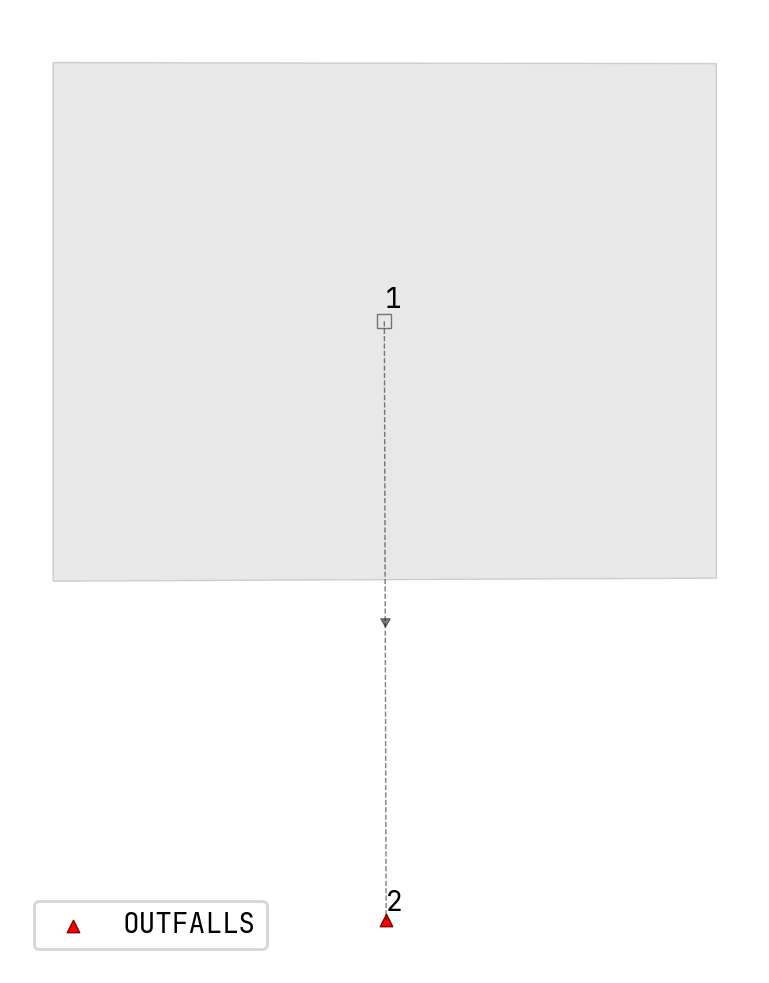

In [60]:
fig, ax = init_empty_map_plot()
ax.set_axis_off()
ax.set_aspect('equal')
add_node_map(ax, inp)
add_subcatchment_map(ax, inp, add_connector_arrows=True)
add_node_labels(ax, inp, ha='left', y_offset=45)
add_subcatchments_labels(ax, inp, ha='left', y_offset=65)


Then run the model and plot the subcatchment's runoff and groundwater water flow along with the outfall node's total inflow on the same time series graph. Create another time series graph that plots the subcatchment's groundwater elevation on the left axis and its soil moisture on the right axis.

In [61]:
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmptelw5l67/example_run_swmm.inp:   0%|          | 0/10…

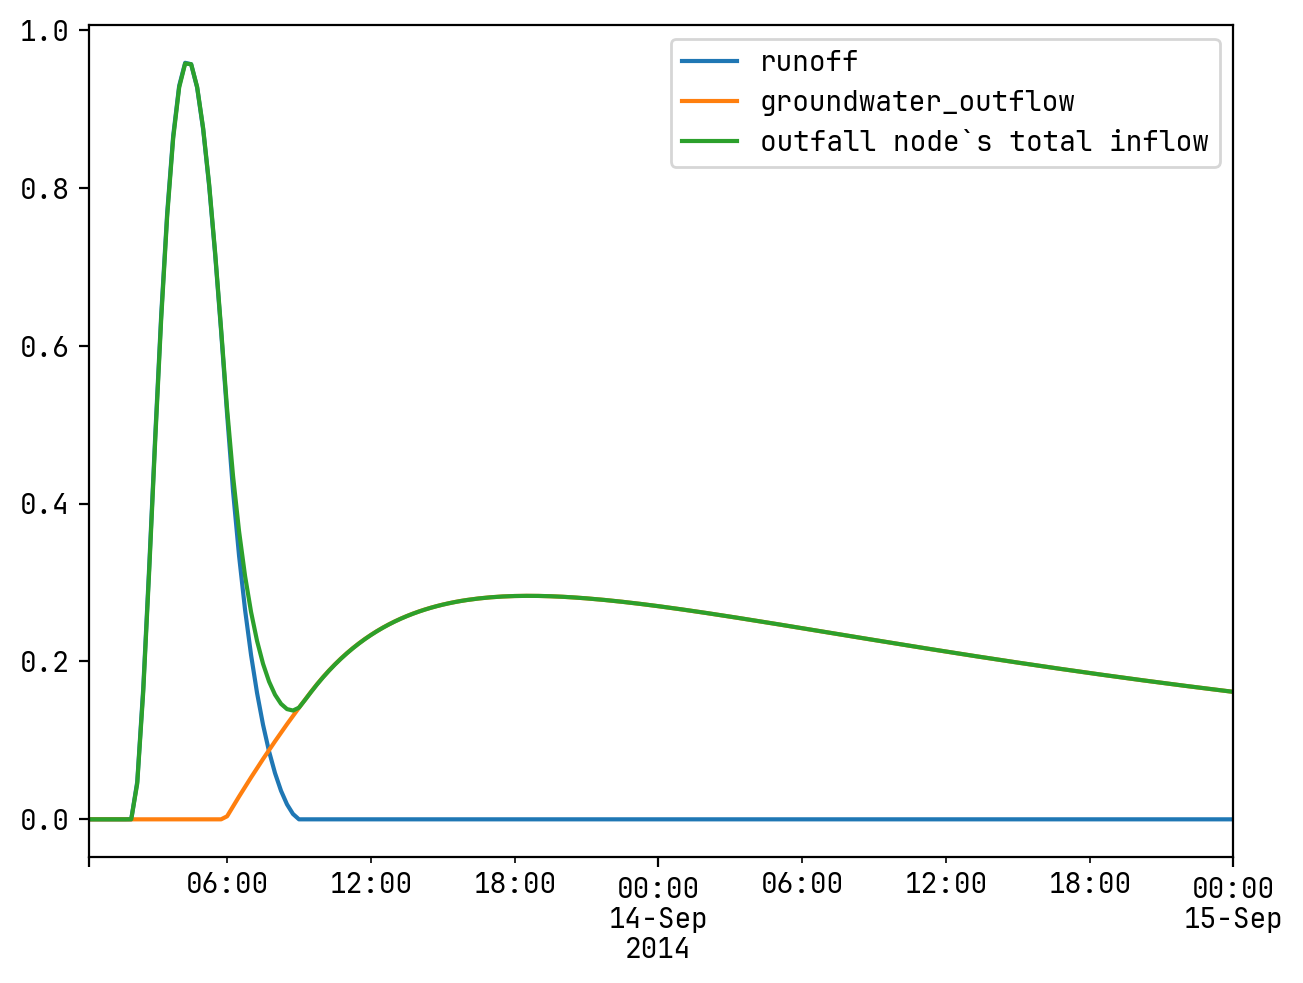

In [62]:
fig, ax = plt.subplots()
out.get_part(OBJECTS.SUBCATCHMENT, '1', [VARIABLES.SUBCATCHMENT.RUNOFF, VARIABLES.SUBCATCHMENT.GW_OUTFLOW]).plot(ax=ax)
out.get_part(OBJECTS.NODE, '2', [VARIABLES.NODE.TOTAL_INFLOW]).plot(ax=ax, label='outfall node`s total inflow')
ax.legend()

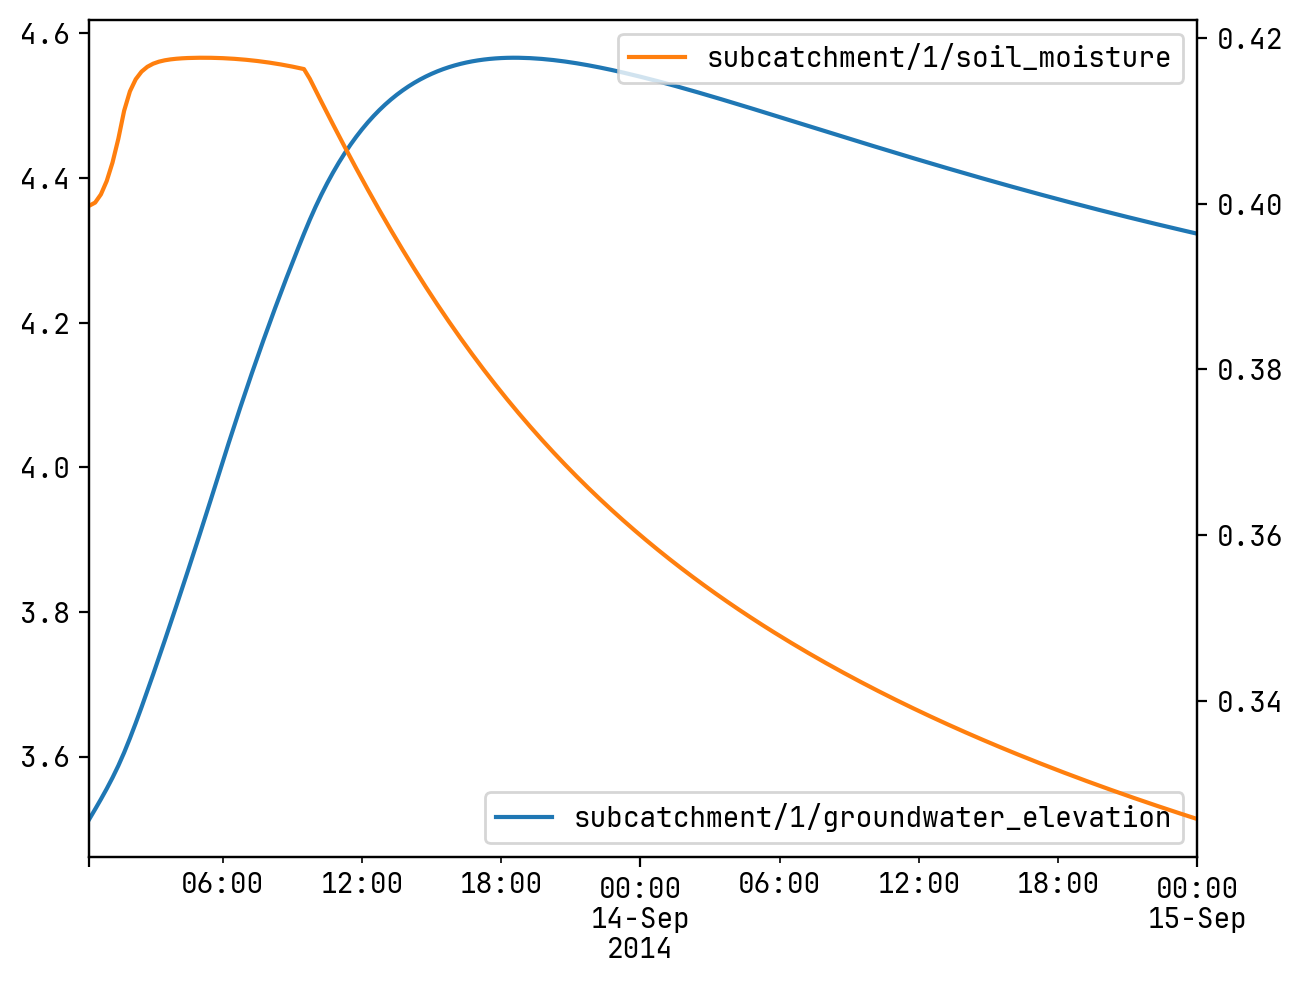

In [63]:
fig, ax = plt.subplots()
ax_right = ax.twinx()
out.get_part(OBJECTS.SUBCATCHMENT, '1', VARIABLES.SUBCATCHMENT.GW_ELEVATION).plot(ax=ax)
out.get_part(OBJECTS.SUBCATCHMENT, '1', VARIABLES.SUBCATCHMENT.SOIL_MOISTURE).plot(ax=ax_right, color='C1', legend=True)
ax.legend()


Note how it takes 6 hours for the groundwater level to reach the 4 foot elevation at which  groundwater flow can begin. 

Before this time the outfall node see only surface runoff. 

Then it sees combined surface and groundwater flow for another 3 hours until surface runoff ceases. 

After that it sees all groundwater flow. 

This flow keeps rising as the water table height increases due to percolation from the upper soil zone until hour 19. 

After that it begins to recede as the upper zone moisture content is depeleted and the water table height drops.

---

See what effect changing the Aquifer's conductivity from 0.1 in/hr to 1.0 in/hr has on the groundwater's behavior.

In [64]:
inp.AQUIFERS['1'].Ks = 1.0
with swmm5_run_temporary(inp.copy(), run=swmm5_run_progress, label='example_run_swmm') as res:
    out = res.out  # type: SwmmOutput
    rpt = res.rpt  # type: SwmmReport

swmm5 /var/folders/3v/lct6k8mn02xdl7r3zg30bjl00000gn/T/tmpcng1i_2p/example_run_swmm.inp:   0%|          | 0/10…

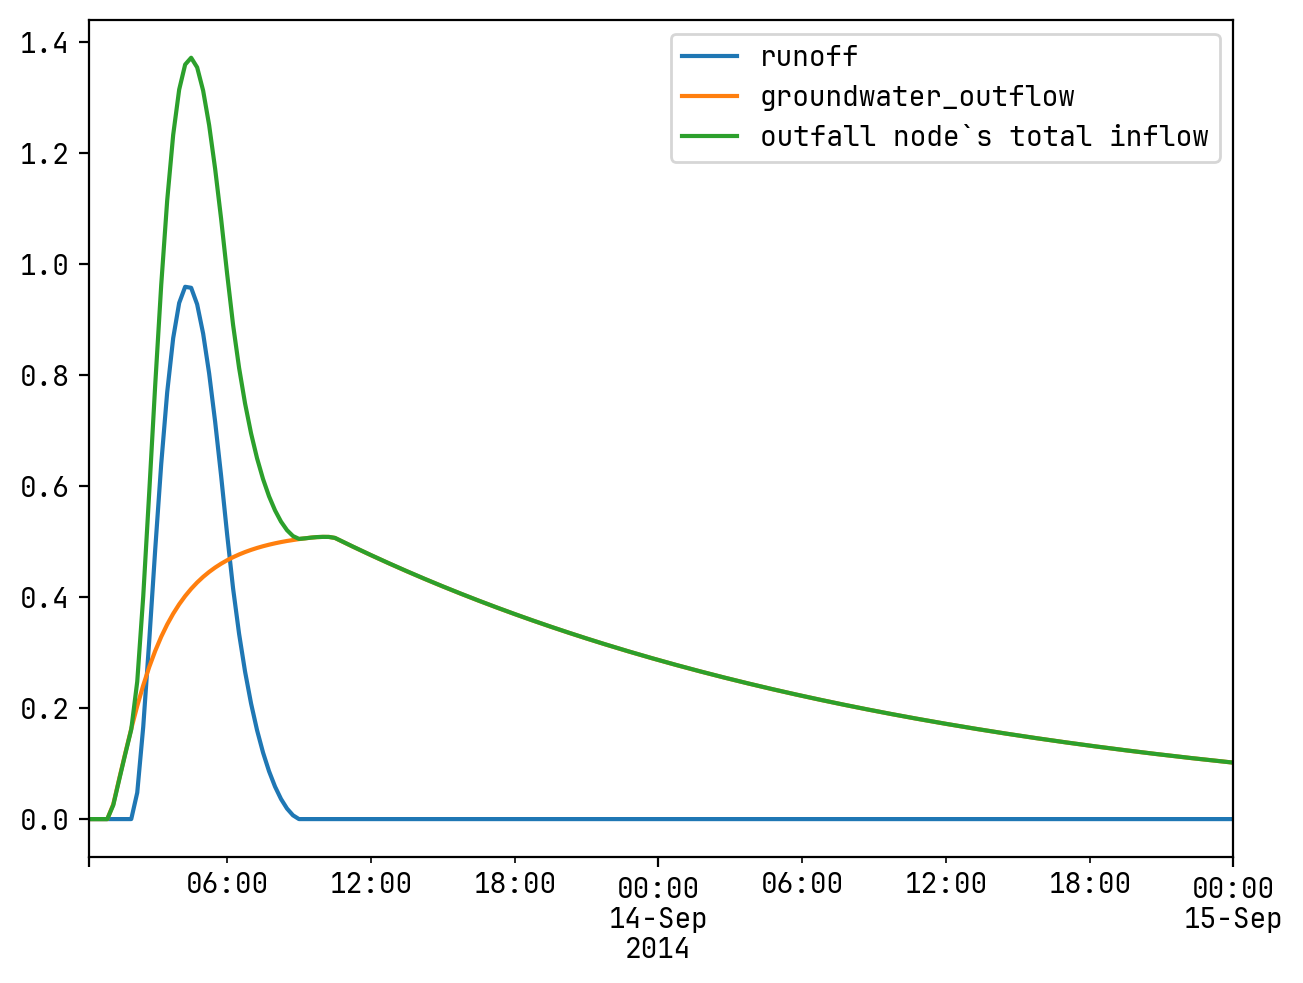

In [65]:
fig, ax = plt.subplots()
out.get_part(OBJECTS.SUBCATCHMENT, '1', [VARIABLES.SUBCATCHMENT.RUNOFF, VARIABLES.SUBCATCHMENT.GW_OUTFLOW]).plot(ax=ax)
out.get_part(OBJECTS.NODE, '2', [VARIABLES.NODE.TOTAL_INFLOW]).plot(ax=ax, label='outfall node`s total inflow')
ax.legend()

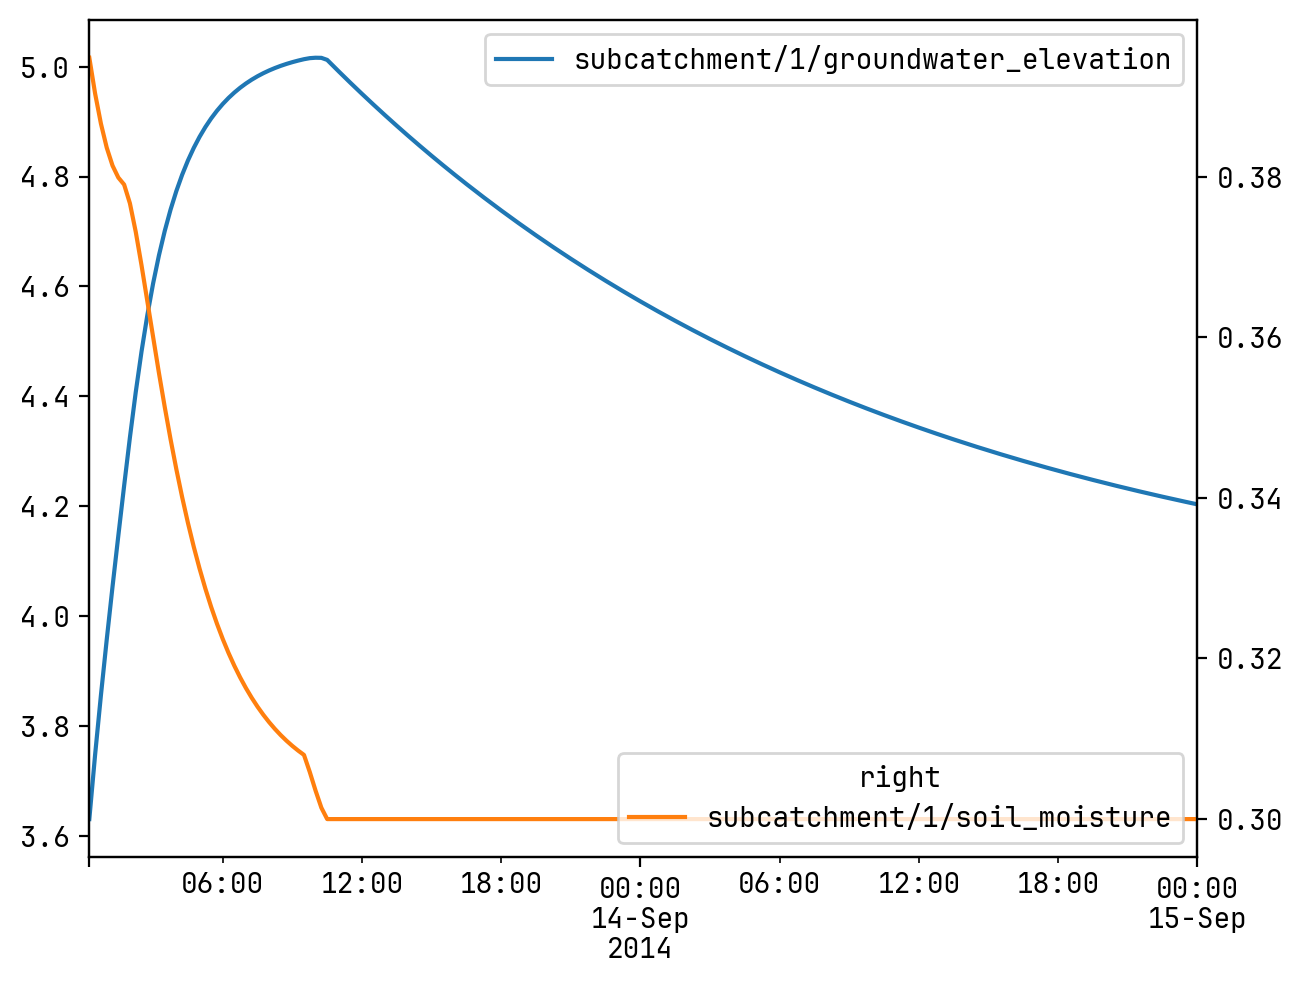

In [68]:
fig, ax = plt.subplots()
ax_right = ax.twinx()
out.get_part(OBJECTS.SUBCATCHMENT, '1', VARIABLES.SUBCATCHMENT.GW_ELEVATION).plot(ax=ax)
out.get_part(OBJECTS.SUBCATCHMENT, '1', VARIABLES.SUBCATCHMENT.SOIL_MOISTURE).plot(ax=ax_right, color='C1', legend=True)
ax_right.legend(loc='lower right', title='right')
ax.legend()

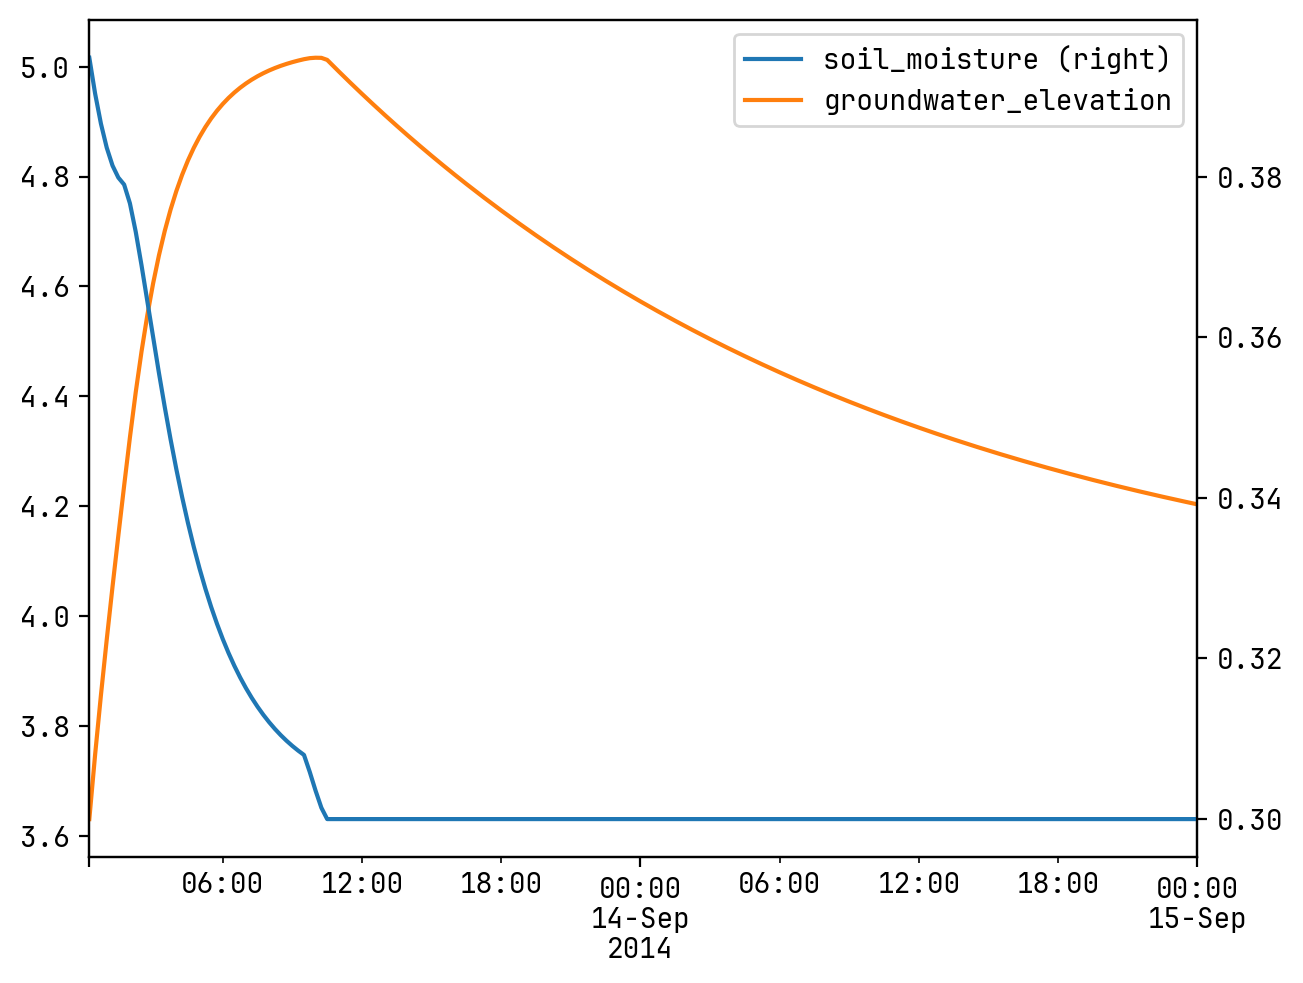

In [67]:
ax = out.get_part(OBJECTS.SUBCATCHMENT, '1', [VARIABLES.SUBCATCHMENT.SOIL_MOISTURE, VARIABLES.SUBCATCHMENT.GW_ELEVATION]).plot(secondary_y=[VARIABLES.SUBCATCHMENT.SOIL_MOISTURE], mark_right=True)